# データ処理の基礎
ここでは、pythonを使ってデータを取り扱う方法を紹介します。

使用するパッケージは、以下の3つです。

- ggplot: データのグラフ化パッケージ
- pandas: pythonでRのデータフレームと同様の処理をす
- numpy: pythonで数値を処理する基本パッケージ

最初に必要なパッケージをインポートします。

In [1]:
# python用のパッケージ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from ggplot import *
%matplotlib inline

## なぜExcelではなく、pythonを使うのか？ 
自然な流れとして、「なぜExcelではなく、pythonを使うのか」という疑問が湧いてくるでしょう。

何でもできそうなExcelにも弱点があります。その大きなものは、カラム数の制限です。 大量のデータを処理するには、Excelのカラム数では不十分なのです。

## データの取り込み
pandasパッケージでは、様々なタイプのデータを取り扱うことができます。主に以下の３つのデータの取り扱い方を説明します。

- CSVファイル: カンマで区切られたファイルで最もよく使われているデータ形式
- Excelファイル: Microsoft Excelで作られたファイル
- データベース: データベース（MySQL）のテーブルやQuery結果

最初にCSVファイルを読み込む例を示します。読み込みファイルは、ローカルのファイル、 ネットワークで公開されているファイルの両方を指定することができます。

CSVのファイル読み込みには、read_csv関数を使用します。この関数の戻り値は、pandasのデータフレームです。

In [2]:
# 久保本の3章のデータをネットから取り込む
d = pd.read_csv('http://hosho.ees.hokudai.ac.jp/~kubo/stat/iwanamibook/fig/poisson/data3a.csv')
type(d)

pandas.core.frame.DataFrame

### データの素性を知る
読み込んだデータがどのような物なのかその素性をしるために、info、describe関数を使用します。

info関数では、dには100個のレコードが入っており、x, y, fの３つのカラムからできており、 xが整数、yは実数、fにはオブジェクトが入っており、欠損値（null）はないことが分かります。

In [3]:
# どのようなデータが入っているか調べる
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
y    100 non-null int64
x    100 non-null float64
f    100 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


このデータは、「データ解析のための統計モデリング入門」から引用しており、x, y, fは、以下の様な意味を持っています。

- yi: 個体iの種子数
- xi: 個体iのサイズ
- fi: 個体iが施肥処理ならT、肥料なしならC

describe関数では、各カラム毎に個数、平均、標準偏差、最小値、25%、50%、75%の値、最大値が表示されます。

In [4]:
# データのばらつきを見る
d.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


実際にdにどのような値が入っているか調べるには、最初のn個を表示するhead、最後のn個を表示するtailが便利です。

In [5]:
# 最初の3個を表示してみる、最後の5個の場合には、tail(5)。個数を省略すると5個分のデータが表示される
d.head(3)

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C


### 行とカラム（列）の操作
pandasのデータフレームから特定のカラムや行を取り出す方法を以下に示します。

カラムの指定方法は、2通りあります。
```
データフレーム.カラム名
データフレーム['カラム名']
```

In [6]:
# カラム(列)を取り出す方法
print d.y.head()
print d['y'].head()

0     6
1     6
2     6
3    12
4    10
Name: y, dtype: int64
0     6
1     6
2     6
3    12
4    10
Name: y, dtype: int64


特定の行を取り出す場合には、ixを使って以下の様に指定します。

In [7]:
# 行を取り出す方法
print d.ix[0]

y       6
x    8.31
f       C
Name: 0, dtype: object


### データの分布を知る
データを可視化して、データの分布をみてみましょう。データの可視化には、ggplotパッケージを使用します。 ggplotは、Rのggplot2と同様の機能をpythonで使えるようにしたもので、今も開発が進んでいます。

ggplotでの図化は、ggplot関数に表示したい図を足し込んでいきます。

以下の例では、ggplotで、データフレームとx軸要素、y軸要素を指定し、 geom_point関数で散布図を指定し、print関数で表示すると図化されます。

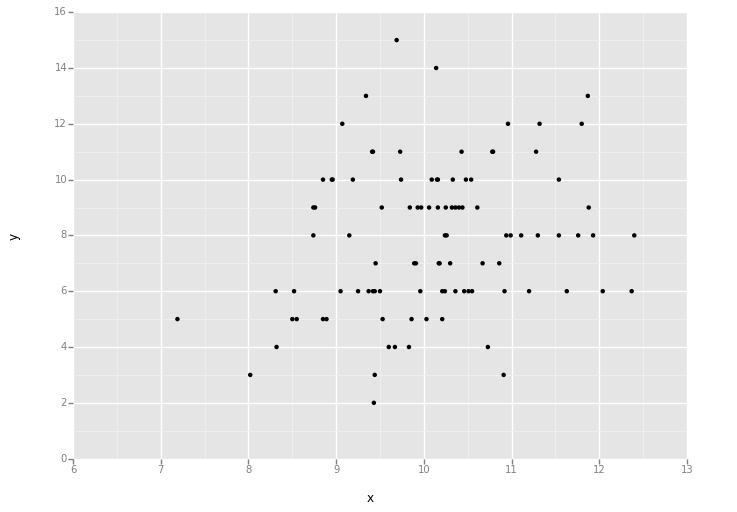

<ggplot: (8746603280341)>


In [8]:
# データの分布を知る
# ggplotに表示したいものを足していく（直感的な図化方法）
p = ggplot(d, aes(x='x', y='y'))
p += geom_point()
print(p)

fのタイプ（C, T）別にグラフを分けて表示するのも、facet_wrap関数を足すだけでできてしまいます。

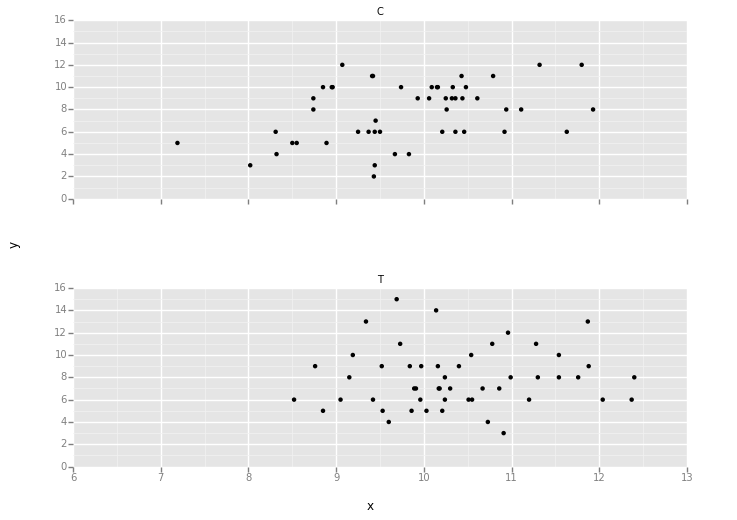

<ggplot: (8746602409341)>


In [9]:
# fの値でグラフを分けて表示する例
p = ggplot(d, aes(x='x', y='y'))
p += geom_point()
p += facet_wrap('f')
print(p)

一番よく使うのは、プロットするときにf毎に色分けする方法です。

ggplotでは、aesのcolor属性に色別に使うカラム名を指定することで、カラム毎の色分けプロットができます。

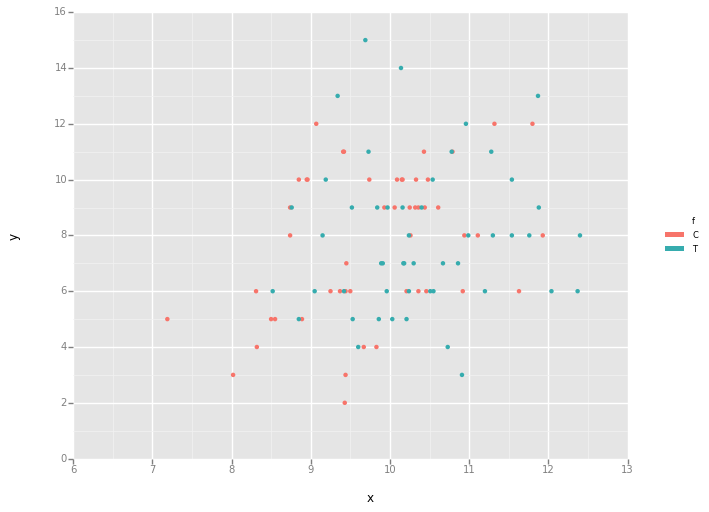

<ggplot: (8746601913185)>


In [10]:
# fの値で色を変えてプロット
p = ggplot(d, aes(x='x', y='y', color='f'))
p += geom_point()
print(p)

## データの加工
データフレームを使うとデータの加工がとても簡単にできます。 以下の様な処理も一行でできてしまいます。

- データの絞り込み
- SQLのgroup byと同様な集計処理

### データの絞り込み
データの絞り込みは、以下の形式で実行します。
```
データフレーム[絞り込み条件]
```
例として、施肥のあるものd.fがTの物だけを取り出すには、以下の様にd[d.f == 'T']とするだけです。

In [11]:
# データの絞り込み
# 施肥のあるもの（f=Tのもの）を取り出す
d_T = d[d.f == 'T']
d_T.head()

,y,x,f
50,14,10.14,T
51,6,9.05,T
52,7,9.89,T
53,9,8.76,T
54,6,12.04,T


In [12]:
# 同様に肥料のなしのもの
d_C = d[d.f == 'C']
d_C.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


### 集計処理
groupbyを使った集計の例として、種子数y毎の度数を計算してみましょう。

size関数を使うと、groupbyで指定されたレコードの数が返されます。


In [13]:
# 肥料なしの種子数y毎の度数
d_C.groupby('y').size()

y
2      1
3      2
4      3
5      4
6     10
7      1
8      5
9      8
10     9
11     4
12     3
dtype: int64

集計結果をggplotのヒストグラムと比較してみましょう。

ヒストグラムの追加は、geom_histogram関数で行い、binwidth=1と指定することで、 yを幅=1で集計します。fill='grey'で塗りつぶしの色をグレイに指定しています。

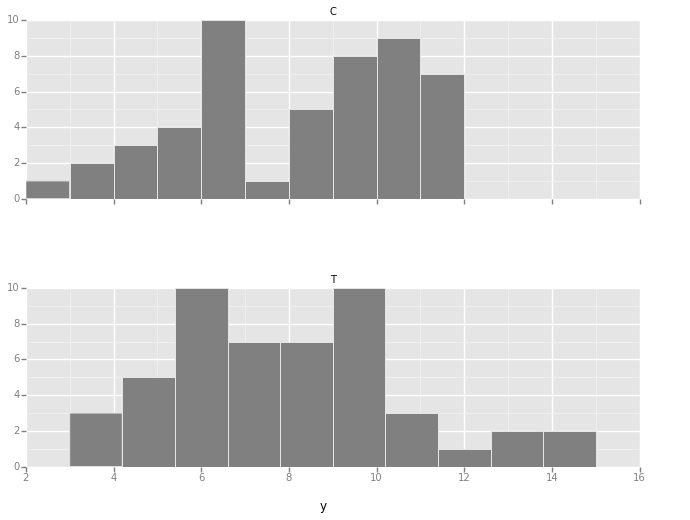

<ggplot: (8746601871681)>


In [14]:
# F別のヒストグラムを表示
p = ggplot(d, aes(x='y'))
p += geom_histogram(aes(binwidth=1), fill='grey')
p += facet_wrap('f')
print(p)

残念ながら、ggplotのヒストグラムの表示には障害があるように見受けられます

pandasのグラフの見栄えを良くするために、seabornをインポートし、pandasのhist関数でヒストグラムをプロットしてみます。

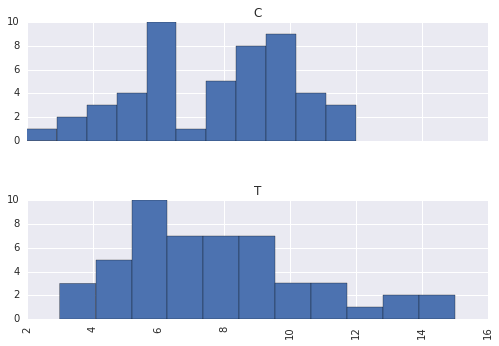

In [15]:
import seaborn as sns
d.hist(column='y', by='f', sharex=True, layout=(2,1), bins=11)
plt.show()

集計関数の例として、y毎の平均を出してみます。これも一行で計算できます。

In [16]:
# y毎のxの平均を知る
d_C.groupby('y').mean()

,x
y,
2,9.430000
3,8.730000
4,9.273333
5,8.282500
6,9.945000
7,9.450000
8,10.596000
9,10.088750
10,9.745556


## データの書き出し
pandasのデータフレームでは、データを他の形式で書き出すことができます。

- to_csv: CSVファイルに出力
- to_excel: Excel形式のファイルに出力
- to_sql: SQLを使ってデータベースに出力

例として、d_C_meanのデータフレームをExcel形式のファイルに出力してみます。

Excelでは、Excelのブック形式のファイルに複数のシートを保存することができ、データフレームはシート単位に保存されます。

最初にExcelWriterを作成し、このwriterを使ってd_C_meanを"mean"というシート名で保存します。

In [17]:
# 集計結果をExcelファイルに出力する
d_C_mean = d_C.groupby('y').mean()
writer = pd.ExcelWriter('data/test.xls')
d_C_mean.to_excel(writer, 'mean')
writer.close()

作成されたExcelファイルtest.xlsがdataフォルダーに保存されます。

Excelファイルを開くと、以下の様に表示されます。
![Sample Excelfile](images/excel.png)

## データベース連携
sageには、sqliteというデータベースが入っているので、これを使ってpandasのデータベース連携機能を説明します。

以下の様にpandasのsqlとsqlite3をインポートします。

In [18]:
import pandas.io.sql as sql
import sqlite3

### データベースを使うための準備
データベースを使うためには、データベースに接続する必要があります。 また、最後には接続conのクローズも必要です。

In [19]:
con = sqlite3.connect("data/chap2.db")

### データフレームをデータベースのテーブルに入れる
先ほど、CSVファイルから読み込んだデータフレームdをテーブルt_dに挿入してみましょう。

In [20]:
# データフレームdをテーブルt_dに入れる
sql.to_sql(d, con=con, name='t_d', if_exists='replace')

### クエリーの実行
準備ができたので、テーブルt_dから種子数y毎の頻度をSQLを使って計算してみます。

SQL文は、以下のようにします。
```
FROM t_d
GROUP BY y;
```
注意する点は、count(y)などの集計されたカラムにASを使って名前を付けておくことです。ここでは、cnt_yとしました。 このようにすることで、結果として返されたデータフレームresult_1で集計値を簡単に参照することができます。

In [21]:
# クエリーの実行
query_1 = """
SELECT y, count(y) AS cnt_y
    FROM t_d
    GROUP BY y;
"""
result_1 = sql.read_sql_query(query_1, con)
print result_1.head()
print result_1.cnt_y.head()

   y  cnt_y
0  2      1
1  3      3
2  4      5
3  5      9
4  6     20
0     1
1     3
2     5
3     9
4    20
Name: cnt_y, dtype: int64


最後にデータベースとの接続をクローズします。

In [22]:
# データベースのクローズ
con.close()